<a href="https://colab.research.google.com/github/anjalipatel101/481_Project_Fall_2023/blob/official_np/20epo_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/imsparsh/animal-breed-cats-and-dogs"
)



In [ ]:
from google.colab import drive

#used for unmounting the drive
drive.flush_and_unmount()

drive.mount('/content/drive')

#Unzip archive.zip for access to animal images
!unzip '/content/drive/MyDrive/archive4.zip'


In [4]:
!pip install -q kaggle


!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download imsparsh/animal-breed-cats-and-dogs

 99% 747M/753M [00:06<00:00, 80.7MB/s]
100% 753M/753M [00:08<00:00, 97.6MB/s]


In [ ]:
!unzip animal-breed-cats-and-dogs.zip

In [6]:
import numpy as np
import pandas as pd
import os

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
train_path = '/content/Cats-and-Dogs-Breed-Dataset-main/TRAIN'
test_path  = '/content/Cats-and-Dogs-Breed-Dataset-main/TEST'

In [9]:
## Get list of class names ##

Name=[]
for file in os.listdir(train_path):
    Name+=[file]
print(Name)
print(len(Name))

['american_pit_bull_terrier', 'yorkshire_terrier', 'birman', 'havanese', 'samoyed', 'bengal', 'miniature_pinscher', 'persian', 'egyptian_mau', 'chihuahua', 'sphynx', 'maine_coon', 'american_bulldog', 'siamese', 'german_shorthaired', 'leonberger', 'bombay', 'scottish_terrier', 'keeshond', 'pug', 'abyssinian', 'shiba_inu', 'basset_hound', 'pomeranian', 'english_setter', 'english_cocker_spaniel', 'british_shorthair', 'russian_blue', 'ragdoll', 'beagle', 'great_pyrenees', 'staffordshire_bull_terrier', 'japanese_chin', 'saint_bernard', 'boxer', 'newfoundland', 'wheaten_terrier']
37


In [10]:
## Mapping categorical labels with a numerical value ##

mapping={ 'basset_hound':0, 'beagle':1, 'russian_blue':2, 'pomeranian':3, 'ragdoll':4,
         'staffordshire_bull_terrier':5, 'keeshond':6, 'siamese':7, 'pug':8, 'shiba_inu':9,
         'american_pit_bull_terrier':10, 'bengal':11, 'british_shorthair':12, 'newfoundland':13,
         'havanese':14, 'japanese_chin':15, 'german_shorthaired':16, 'birman':17, 'maine_coon':18,
         'english_cocker_spaniel':19, 'scottish_terrier':20, 'wheaten_terrier':21, 'chihuahua':22,
         'american_bulldog':23, 'abyssinian':24, 'boxer':25, 'yorkshire_terrier':26, 'miniature_pinscher':27,
         'sphynx':28, 'samoyed':29, 'leonberger':30, 'bombay':31, 'english_setter':32, 'persian':33,
         'great_pyrenees':34, 'egyptian_mau':35, 'saint_bernard':36 }

In [11]:
# Loading images the directory to where each subdirectory represents
# the breed type (class) and contains images corresponding to that class

dataset=[]
count=0

for file in os.listdir(train_path):
    path=os.path.join(train_path,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(180,180))
        image=img_to_array(image)
        image=image/255.0 # Normalize pixel values
        dataset.append([image,count])
    count=count+1

In [12]:
test=[] # List to store test images
testfile=[] # List to store test file names

for file in os.listdir(test_path):
    path=os.path.join(test_path,file)
    image=load_img(path, grayscale=False, color_mode='rgb', target_size=(180,180))
    image=img_to_array(image)
    image=image/255.0  # Normalize pixel values
    test+=[image]
    testfile+=[file]

In [13]:
## unpack image data array and labels ##
data,labels0=zip(*dataset)

In [14]:
## one-hot encoding numercial -> categorcial ##
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [15]:
## Convert data into NumPy arrays ##
data=np.array(data)
test=np.array(test)

In [16]:
## Reshape arrays into 4D array ##
data2=data.reshape(-1,180,180,3)
test2=test.reshape(-1,180,180,3)

In [17]:
# Split the dataset into training and testing sets for data & labels #

trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4712, 180, 180, 3)
(1178, 180, 180, 3)
(4712, 37)
(1178, 37)


In [18]:
# Produce variations of the original images based on specific transformations #
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [19]:
# DenseNet121 Keras model initialized with pre-trained ImageNet weights, with its layers frozen

pretrained_model3 = tf.keras.applications.DenseNet121(input_shape=(180,180,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [20]:
# New layers are appended for further feature extraction and classification

inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(37, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
## Keras: Train the Nueral Network Model ##

his_model = model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
136/148 [==========================>...] - ETA: 44s - loss: 0.5567 - accuracy: 0.8177

In [23]:
#!pip install pyyaml h5py
model.save('his_model.keras') #save the model

In [ ]:
## Checking model got saved correctly ##

new_model = tf.keras.models.load_model('his_model.keras')

# Show the model architecture
new_model.summary()

In [24]:
## Report of Classification Metrics for each breed ##
y_pred = model.predict(testx)
pred = np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

37/37 [==============================] - 132s 3s/step
              precision    recall  f1-score   support

           0       0.64      0.41      0.50        22
           1       1.00      0.91      0.95        33
           2       0.86      0.66      0.75        29
           3       0.90      0.90      0.90        31
           4       0.93      1.00      0.96        27
           5       0.89      0.69      0.78        36
           6       0.97      0.80      0.88        40
           7       0.91      0.91      0.91        32
           8       0.94      0.87      0.91        39
           9       0.84      0.84      0.84        31
          10       0.93      0.93      0.93        30
          11       0.95      0.68      0.79        31
          12       0.61      0.96      0.75        28
          13       0.91      0.91      0.91        35
          14       0.94      0.86      0.90        36
          15       0.91      0.88      0.90        34
          16       1.00    

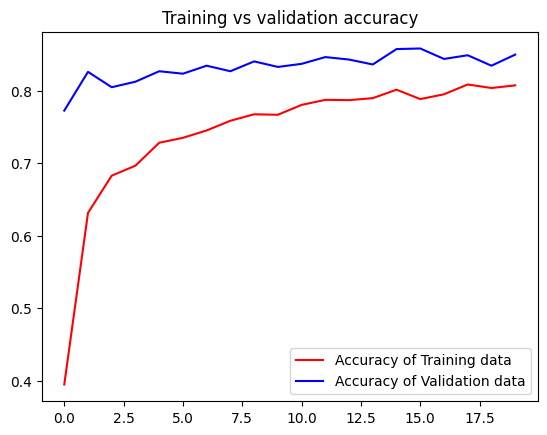

<Figure size 640x480 with 0 Axes>

In [27]:
## Plot the accuracy between the training and validation set ##
get_acc = his_model.history['accuracy']
value_acc = his_model.history['val_accuracy']
get_loss = his_model.history['loss']
validation_loss = his_model.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

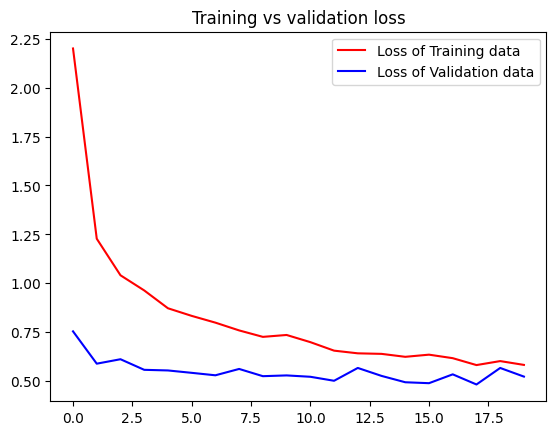

<Figure size 640x480 with 0 Axes>

In [28]:
## Plot the accuracy between the training and validation loss set ##
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

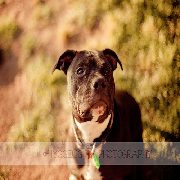

In [47]:
# Get the image
load_img("/content/Cats-and-Dogs-Breed-Dataset-main/TEST/1.jpg",target_size=(180,180))

In [ ]:
# Image transformations
image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [49]:
reverse_mapping={  0:'Basset Hound', 1:'Beagle', 2:'Russian Blue', 3:'Pomeranian', 4:'Ragdoll',
         5:'Staffordshire Bull Terrier', 6:'Keeshond', 7:'Siamese', 8:'Pug', 9:'Shiba Inu',
         10:'American Pitbull Terrier', 11:'Bengal', 12:'British Shorthair', 13:'Newfoundland',
         14:'Havanese', 15:'Japanese Chin', 16:'German Shorthaired', 17:'Birman', 18:'Maine Coon',
         19:'English Cocker Spaniel', 20:'Scottish Terrier', 21:'Wheaten Terrier', 22:'Chihuahua',
         23:'American Bulldog', 24:'Abyssinian', 25:'Boxer', 26:'Yorkshire Terrier', 27:'Miniature Pinscher',
         28:'Sphynx', 29:'Samoyed', 30:'Leonberger', 31:'Bombay', 32:'English Setter', 33:'Persian',
         34:'Great Pyrenees', 35:'Egyptian Mau', 36:'Saint Bernard' }

# Predict the breed
def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("The Breed of the Animal : {}.".format(move_name), "\n")

1/1 [==============================] - 0s 202ms/step
The Breed of the Animal : Yorkshire Terrier. 



37/37 [==============================] - 115s 3s/step


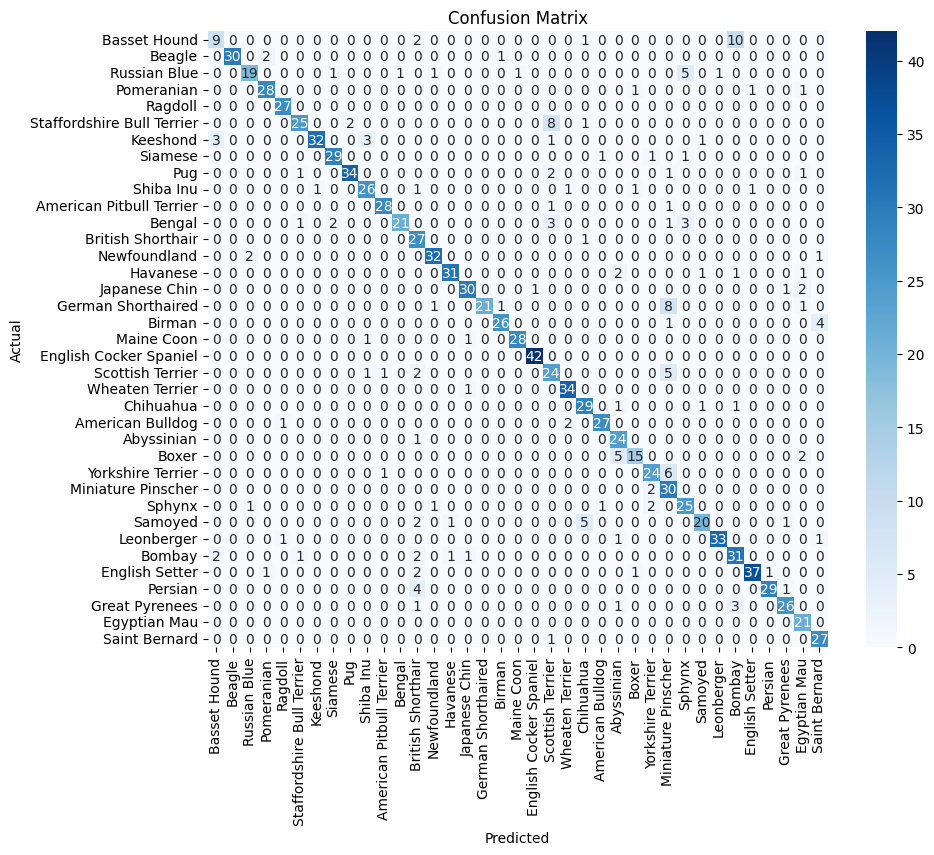

In [36]:
## Making a Confusion Matrix ##
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(testx)
pred = np.argmax(y_pred, axis=1)
ground = np.argmax(testy, axis=1)

# Generating  matrix
conf_matrix = confusion_matrix(ground, pred)

# Displaying the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=reverse_mapping.values(),
            yticklabels=reverse_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt


test_images = '/content/Cats-and-Dogs-Breed-Dataset-main/TEST'
# 1. Make predictions on the test dataset
predictions = his_model.predict(test_images)



# predictions and actual labels alongside the images
num_images_to_display = 5

for i in range(num_images_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(test_labels[i])

    # Map predicted and actual labels to their corresponding class names
    predicted_label_name = reverse_mapping.get(predicted_label, "Unknown")
    actual_label_name = everse_mapping.get(actual_label, "Unknown")

    # Display the image
    plt.imshow(test_images[i])  # Assuming test_images is a NumPy array of images
    plt.title(f"Predicted: {predicted_label_name}, Actual: {actual_label_name}")
    plt.axis('off')
    plt.show()
'''

will probably need test labels so another map for the test dataset


In [43]:
#Outputing the supplemental information

print("Below are some facts/characteristics about the {}:" .format(move_name),"\n")
get_breed_facts(value)


def get_breed_facts(value):

  if value == 0:      #Basset Hound
      print("- Known for their distinctive, long ears and droopy expression.")
      print("- Excellent sense of smell, traditionally used in hunting." )
      print("- Generally friendly, affectionate, and good with families.\n")

  elif value == 1:      #Beagle
      print("- Small to medium-sized with a friendly and curious demeanor.")
      print("- Keen sense of smell, often used in detection work.")
      print("- Energetic and requires regular exercise.\n")

  elif value == 2:      #Russian Blue
      print("- Recognized for striking blue-gray coat and vivid green eyes.")
      print("- Reserved nature, forming strong bonds with owners.")
      print("- Low-shedding and hypoallergenic.\n")

  elif value == 3:      #Pomeranian
      print("- Small, fluffy dogs with a lively and extroverted personality.")
      print("- Distinctive fox-like face and a luxurious double coat.")
      print("- Bold and confident, making them good watchdogs.\n")

  elif value == 4:      #Ragdoll
      print("- Cats with striking blue eyes, silky coat, and docile temperament.")
      print("- Tend to go limp when picked up, known for gentle nature.")
      print("- Sociable cats that enjoy the company of their owners.\n")

  elif value == 5:      #Staffordshire Bull Terrier
      print("- Muscular and agile dogs with loyalty and affection.")
      print("- Generally good with children and a friendly disposition.")
      print("- Proper training and socialization are crucial.\n")

  elif value == 6:      #Keeshond
      print("- Medium-sized dogs with a spectacles appearance.")
      print("- Friendly and outgoing nature, excellent companions.")
      print("- Thick double coat requires regular grooming.\n")

  elif value == 7:      #Siamese
      print("- Recognized for striking blue almond-shaped eyes and color-point coat.")
      print("- Highly vocal and interactive with owners.")
      print("- Intelligent cats requiring mental stimulation.\n")

  elif value == 8:      #Pug
      print("- Compact size, wrinkled face, and curled tail.")
      print("- Playful and sociable nature, suitable for various households.")
      print("- Prone to weight gain, sensitive to extreme temperatures./n")

  elif value == 9:      #Shiba Inu
      print("- Japanese breed with a fox-like appearance.")
      print("- Independent nature, forming strong bonds once comfortable.")
      print("- Strong prey drive, requiring early training and socialization./n")

  elif value == 10:     #American Pit Bull Terrier
      print("- Strong, athletic dogs with loyalty and affection.")
      print("- Good with children when trained and socialized.")
      print("- Responsible ownership and positive reinforcement are crucial./n")

  elif value == 11:     #Bengal
      print("- Cats with a distinctive spotted or marbled coat.")
      print("- Energetic and playful, may enjoy climbing.")
      print("- Intelligent cats requiring mental stimulation./n")

  elif value == 12:     #British Shorthair
      print("- Recognized for round faces, dense coat, and large eyes.")
      print("- Calm and easygoing temperament.")
      print("- Adaptable to various living environments.\n")


  elif value == 13:     #Newfoundland
      print("- Large and powerful dogs with a gentle and sweet nature.")
      print("- Excellent swimmers, used in water rescue work.")
      print("- Good with children, patient demeanor.\n")

  elif value == 14:     #Havanese
      print("- Small, sturdy dogs with a long, silky coat.")
      print("- Friendly disposition, good with children and other pets.")
      print("- Regular grooming is essential.\n")

  elif value == 15:     #Japanese Chin
      print("- Small, elegant dogs with a distinctive oriental appearance.")
      print("- Friendly and gentle temperament.")
      print("- Entertaining antics and may form strong bonds.\n")

  elif value == 16:     #German Shorthaired Pointer
      print("- Versatile hunting dogs with athleticism and intelligence.")
      print("- Short coat, highly energetic, requiring regular exercise.")
      print("- Friendly and trainable, excellent family pets.\n")

  elif value == 17:     #Birman
      print("- Cats with striking blue almond-shaped eyes and color-point markings.")
      print("- Gentle and affectionate nature.")
      print("- Relatively low-maintenance grooming.\n")

  elif value == 18:     #Maine Coon
      print("- One of the largest domestic cat breeds.")
      print("- Friendly and sociable, often good with children.")
      print("- Prized for intelligence and adaptability.\n")

  elif value == 19:     #English Cocker Spaniel
      print("- Medium-sized dogs with a long, silky coat.")
      print("- Friendly and affectionate, suitable for families.")
      print("- Regular exercise and mental stimulation needed.\n")

  elif value == 20:     #Scottish Terrier
      print("- Small dogs with a distinctive wiry coat.")
      print("- Dignified and independent nature.")
      print("- Proper training and socialization are essential.\n")

  elif value == 21:     #Wheaten Terrier
      print("- Medium-sized dogs with a soft, wheaten-colored coat.")
      print("- Playful nature, good with children and other pets.")
      print("- Regular grooming required.")

  elif value == 22:     #Chihuahua
      print("- One of the smallest dog breeds, with a bold personality.")
      print("- Can exhibit a confident attitude despite their size.")
      print("- Excellent companions for individuals or families in smaller living spaces.\n")

  elif value == 23:     #American Bulldog
      print("- Muscular, athletic dogs known for strength and loyalty.")
      print("- Friendly and outgoing, often good with children.")
      print("- Regular exercise and mental stimulation are important.\n")

  elif value == 24:     #Abyssinian
      print("- Medium-sized cats with a short, ticked coat.")
      print("- Playful and active nature, enjoys climbing.")
      print("- Social cats that may form strong bonds.\n")

  elif value == 25:     #Boxer
      print("- Medium to large-sized dogs with a strong, muscular build.")
      print("- Friendly, intelligent, and protective.")
      print("- Regular exercise is crucial for maintaining physical health.\n")

  elif value == 26:     #Yorkshire Terrier
      print("- Yorkies are small dogs with long, silky fur and a confident attitude.")
      print("- They're smart and can learn tricks and activities quickly.")
      print("- Even though they're tiny, they need playtime and mental stimulation to stay happy.\n")

  elif value == 27:     #Miniature Pinscher
      print("- Small dogs with a compact build, known for their spirited nature.")
      print("- Display a fearless attitude despite their small size.")
      print("- Early socialization and training are essential.\n")

  elif value == 28:     #Sphynx
      print("- Hairless cats with distinctive large ears and wrinkled skin.")
      print("- Require regular bathing to remove oils from their skin.")
      print("- Described as affectionate and enjoying attention.\n")

  elif value == 29:     #Samoyed
      print("- Large, fluffy dogs with a distinctive \"Sammy smile.\"")
      print("- Friendly, sociable, and often good with children.")
      print("- Regular grooming is essential to manage shedding.\n")

  elif value == 30:     #Leonberger
      print("- Large, majestic dogs with a lion-like mane.")
      print("- Gentle and friendly temperament, good with children.")
      print("- Require regular exercise and mental stimulation.\n")

  elif value == 31:     #Bombay
      print("- Medium-sized cats with a sleek, black coat.")
      print("- Friendly and affectionate, forming strong bonds.")
      print("- Often described as \"mini-panthers.\"\n")

  elif value == 32:     #English Setter
      print("- Medium to large-sized dogs with a silky coat.")
      print("- Known for a gentle and friendly demeanor.")
      print("- Moderate energy level, enjoys outdoor activities.\n")

  elif value == 33:     #Persian
      print("- Cats known for a long, luxurious coat, flat face, and expressive eyes.")
      print("- Calm and laid-back personality, prefers a quiet indoor environment.")
      print("- Regular grooming is essential to prevent matting.\n")

  elif value == 34:     #Great Pyrenees
      print("- Giant dogs known for a thick, weather-resistant double coat.")
      print("- Calm and gentle nature, often showing a strong protective instinct.")
      print("- Regular grooming and consistent training are important.\n")

  elif value == 35:     #Egyptian Mau
      print("- Medium-sized cats with a spotted coat resembling wild leopards.")
      print("- Active and playful nature, enjoys climbing and interactive play.")
      print("- May form strong bonds with owners and appreciate mental stimulation.\n")

  elif value == 36:     #Saint Bernard
      print("- Giant dogs with a gentle and friendly disposition.")
      print("- Often good with children and calm indoors.")
      print("- Require regular grooming and may drool due to loose jowls.")


Below are some facts/characteristics about the Yorkshire Terrier: 



NameError: ignored

In [ ]:
#This will allow for text input

import os
import random

# Sample dataset directory paths
train_directory = '/content/Cats-and-Dogs-Breed-Dataset-main/TRAIN'
test_directory = '/content/Cats-and-Dogs-Breed-Dataset-main/TEST'


# Create a reverse mapping for breed to user input
rm = {v: k for k, v in reverse_mapping.items()}

# Function to get a list of image files for a given breed directory
def get_images_for_breed(breed_directory):
    image_files = [f for f in os.listdir(breed_directory) if f.endswith(('.jpg', '.jpeg', '.png'))]
    return image_files

# Function to get random image file for a given breed
def get_random_image_file(breed_directory):
    images = get_images_for_breed(breed_directory)
    if images:
        return random.choice(images)
    else:
        return None

# Function to get facts for a given breed
def get_breed_facts(breed_type):
    # Replace with actual facts retrieval logic
    facts = [
        "Fact 1 about " + breed_type.capitalize(),
        "Fact 2 about " + breed_type.capitalize(),
        "Fact 3 about " + breed_type.capitalize(),
    ]
    return facts

# Function to generate random image and facts for a given breed
def generate_random_image_and_facts(user_input, breed_directory):
    breed_type = user_to_breed_map.get(user_input.lower())
    if breed_type:
        image_file = get_random_image_file(os.path.join(breed_directory, breed_type))
        facts = get_breed_facts(breed_type)

        if image_file and facts:
            image_url = os.path.join(breed_directory, breed_type, image_file)
            print(f"\nRandom Image of {breed_type.capitalize()}: {image_url}")
            print("Facts:")
            for fact in facts:
                print(f"- {fact}")
        else:
            print(f"\nBreed does not exist in dataset.")
    else:
        print(f"\nUser input not found in the mapping.")

if __name__ == "__main__":
    user_input = input("Enter the breed or mapped keyword: ")

    # Use the provided dataset directories for training and testing
    generate_random_image_and_facts(user_input, train_directory)
    generate_random_image_and_facts(user_input, test_directory)


Enter the breed or mapped keyword: beagle


NameError: ignored